In [1]:
from scipy.stats import ttest_ind
import pandas as pd

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
#read the data
file_path = 'hpvdata.csv'
hpvdata = pd.read_csv(file_path)

/var/folders/b3/kkdtnh4d4gjgrk45d_yrf4100000gn/T/ipykernel_92308/3811312610.py:3: DtypeWarning: Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.
  hpvdata = pd.read_csv(file_path)


In [3]:
#filter out all records that has NA values on VAX attitude
hpvdata_cleaned = hpvdata.dropna(subset=['HPV_VAX_attitu_s35'])

In [4]:
# Calculate the percentage of available (non-missing) values in each column
available_percentage = 100 - ((hpvdata_cleaned.isnull().sum() / len(hpvdata_cleaned)) * 100)
# Identify columns with more than 50% available values
columns_to_select = available_percentage[available_percentage > 50].index
# Select the columns from the DataFrame
hpvdata_cleaned = hpvdata_cleaned[columns_to_select]

In [5]:
# Generate correlation matrix
corrmatrix  = hpvdata_cleaned.corr()

/var/folders/b3/kkdtnh4d4gjgrk45d_yrf4100000gn/T/ipykernel_92308/481184728.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmatrix  = hpvdata_cleaned.corr()


In [6]:
vars_ =  {}
for idx in corrmatrix.index:
    if abs(corrmatrix['HPV_VAX_attitu_s35'][idx])>0.7:
        vars_[idx] = corrmatrix['HPV_VAX_attitu_s35'][idx]

In [7]:
# highly correlated variables
vars_

{'sec3_qNa40': -0.8194895556300539,
 'sec3_qNa41': -0.8288331487679043,
 'sec3_qNa42': -0.7710387294314973,
 'sec3_qNb40': -0.8194895556300539,
 'sec3_qNb41': -0.8288331487679043,
 'sec3_qNb42': -0.7710387294314973,
 'sec3_qRa40': 0.8194895556300534,
 'sec3_qRa41': 0.8288331487679041,
 'sec3_qRa42': 0.7710387294314969,
 'sec3_qRb40': 0.8194895556300534,
 'sec3_qRb41': 0.8288331487679041,
 'sec3_qRb42': 0.7710387294314969,
 'HPV_VAX_attitu_s35': 1.0,
 'HPV_VAX_attitu_s7a': 0.9772577624729988,
 'HPV_VAX_attitu_s7b': 0.9772577624729988}

In [8]:
hpvdata_cleaned['HPV_VAX_attitu_s35']
#higher the value, more negative

0       14.0
1        7.0
2       20.0
3       23.0
4       20.0
        ... 
1339     7.0
1343    16.0
1344     7.0
1345    10.0
1346     7.0
Name: HPV_VAX_attitu_s35, Length: 1035, dtype: float64

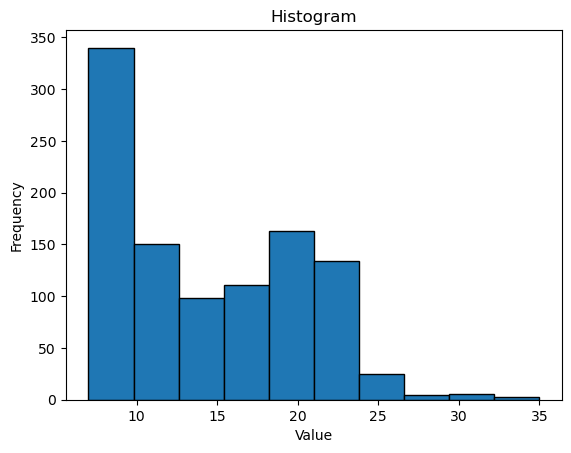

In [11]:
import matplotlib.pyplot as plt
plt.hist(hpvdata_cleaned['HPV_VAX_attitu_s35'], bins=10, edgecolor='black')  # Adjust 'bins' parameter as needed
plt.title('Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [14]:
print('median:',np.median(hpvdata_cleaned['HPV_VAX_attitu_s35']))
group1 = hpvdata_cleaned[hpvdata_cleaned['HPV_VAX_attitu_s35']<=14]
group2 = hpvdata_cleaned[hpvdata_cleaned['HPV_VAX_attitu_s35']>14]

median: 14.0


In [15]:
name = 'age'
print(name)
print('Score<=14')
print(np.mean(group1[name]))
print('Score>14')
print(np.mean(group2[name]))
print('pvalue')
print(ttest_ind(group1[name],group2[name],equal_var=True).pvalue)

age
Score<=14
40.02420856610801
Score>14
37.70281124497992
pvalue
0.00010547514454224569


In [16]:
name = 'sec1_q8'
print('household income')
print('Score<=17')
print(np.mean(group1[group1[name]>-1][name]))
print('Score>17')
print(np.mean(group2[group2[name]>-1][name]))
print('pvalue')
print(ttest_ind(group1[group1[name]>-1][name],group2[group2[name]>-1][name],equal_var=True).pvalue)

household income
Score<=17
3.921787709497207
Score>17
3.8089430894308944
pvalue
0.10788887072652387


In [17]:
from scipy.stats import chi2_contingency
observed = np.zeros((6,2))
observed[0,0] = group1[name].value_counts()[5]
observed[0,1] = group2[name].value_counts()[5]
observed[1,0] = group1[name].value_counts()[4]
observed[1,1] = group2[name].value_counts()[4]
observed[2,0] = group1[name].value_counts()[3]
observed[2,1] = group2[name].value_counts()[3]
observed[3,0] = group1[name].value_counts()[2]
observed[3,1] = group2[name].value_counts()[2]
observed[4,0] = group1[name].value_counts()[1]
observed[4,1] = group2[name].value_counts()[1]
observed[5,0] = 0
observed[5,1] = group2[name].value_counts()[-999]
chi2, p, dof, expected = chi2_contingency(observed)
print(observed)
print(p)

[[240. 200.]
 [ 68.  69.]
 [185. 170.]
 [ 35.  35.]
 [  9.  18.]
 [  0.   6.]]
0.03727051581155899


In [18]:
name = 'sec1_q9'
print('residence')
print('Score<=17')
print(np.mean(group1[group1[name]>-1][name]))
print('Score>17')
print(np.mean(group2[group2[name]>-1][name]))
print('pvalue')
print(ttest_ind(group1[group1[name]>-1][name],group2[group2[name]>-1][name],equal_var=True).pvalue)

residence
Score<=17
2.359404096834264
Score>17
2.180722891566265
pvalue
0.00021387954906117512


In [19]:
observed = np.zeros((3,2))
observed[0,0] = group1[name].value_counts()[3]
observed[0,1] = group2[name].value_counts()[3]
observed[1,0] = group1[name].value_counts()[2]
observed[1,1] = group2[name].value_counts()[2]
observed[2,0] = group1[name].value_counts()[1]
observed[2,1] = group2[name].value_counts()[1]
chi2, p, dof, expected = chi2_contingency(observed)
print(observed)
print(p)

[[285. 208.]
 [160. 172.]
 [ 92. 118.]]
0.0008129056718502946


In [ ]:
np.median(hpvdata_cleaned_['HPV_VAX_attitu_s35'])

In [ ]:
hpvdata